# About
#### This notebook generates the panels for figures 1D and 1E

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.3

plt.rcParams['xtick.major.width'] = 0.5  # Set x-tick major width
plt.rcParams['ytick.major.width'] = 0.5  # Set y-tick major width
plt.rcParams['xtick.minor.width'] = 0.25  # Set x-tick minor width
plt.rcParams['ytick.minor.width'] = 0.25  # Set y-tick minor width

plt.rcParams['xtick.major.size'] = 2  # Set x-tick major length to be shorter
plt.rcParams['ytick.major.size'] = 2  # Set y-tick major length to be shorter
plt.rcParams['xtick.minor.size'] = 1  # Set x-tick minor length to be shorter
plt.rcParams['ytick.minor.size'] = 1  # Set y-tick minor length to be shorter


# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'medium'}

matplotlib.rc('font', **font)
from sparrow.data.amino_acids import VALID_AMINO_ACIDS



In [2]:
from finches import CALVADOS_frontend, Mpipi_frontend


In [3]:
cf = CALVADOS_frontend()
mf = Mpipi_frontend()

/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


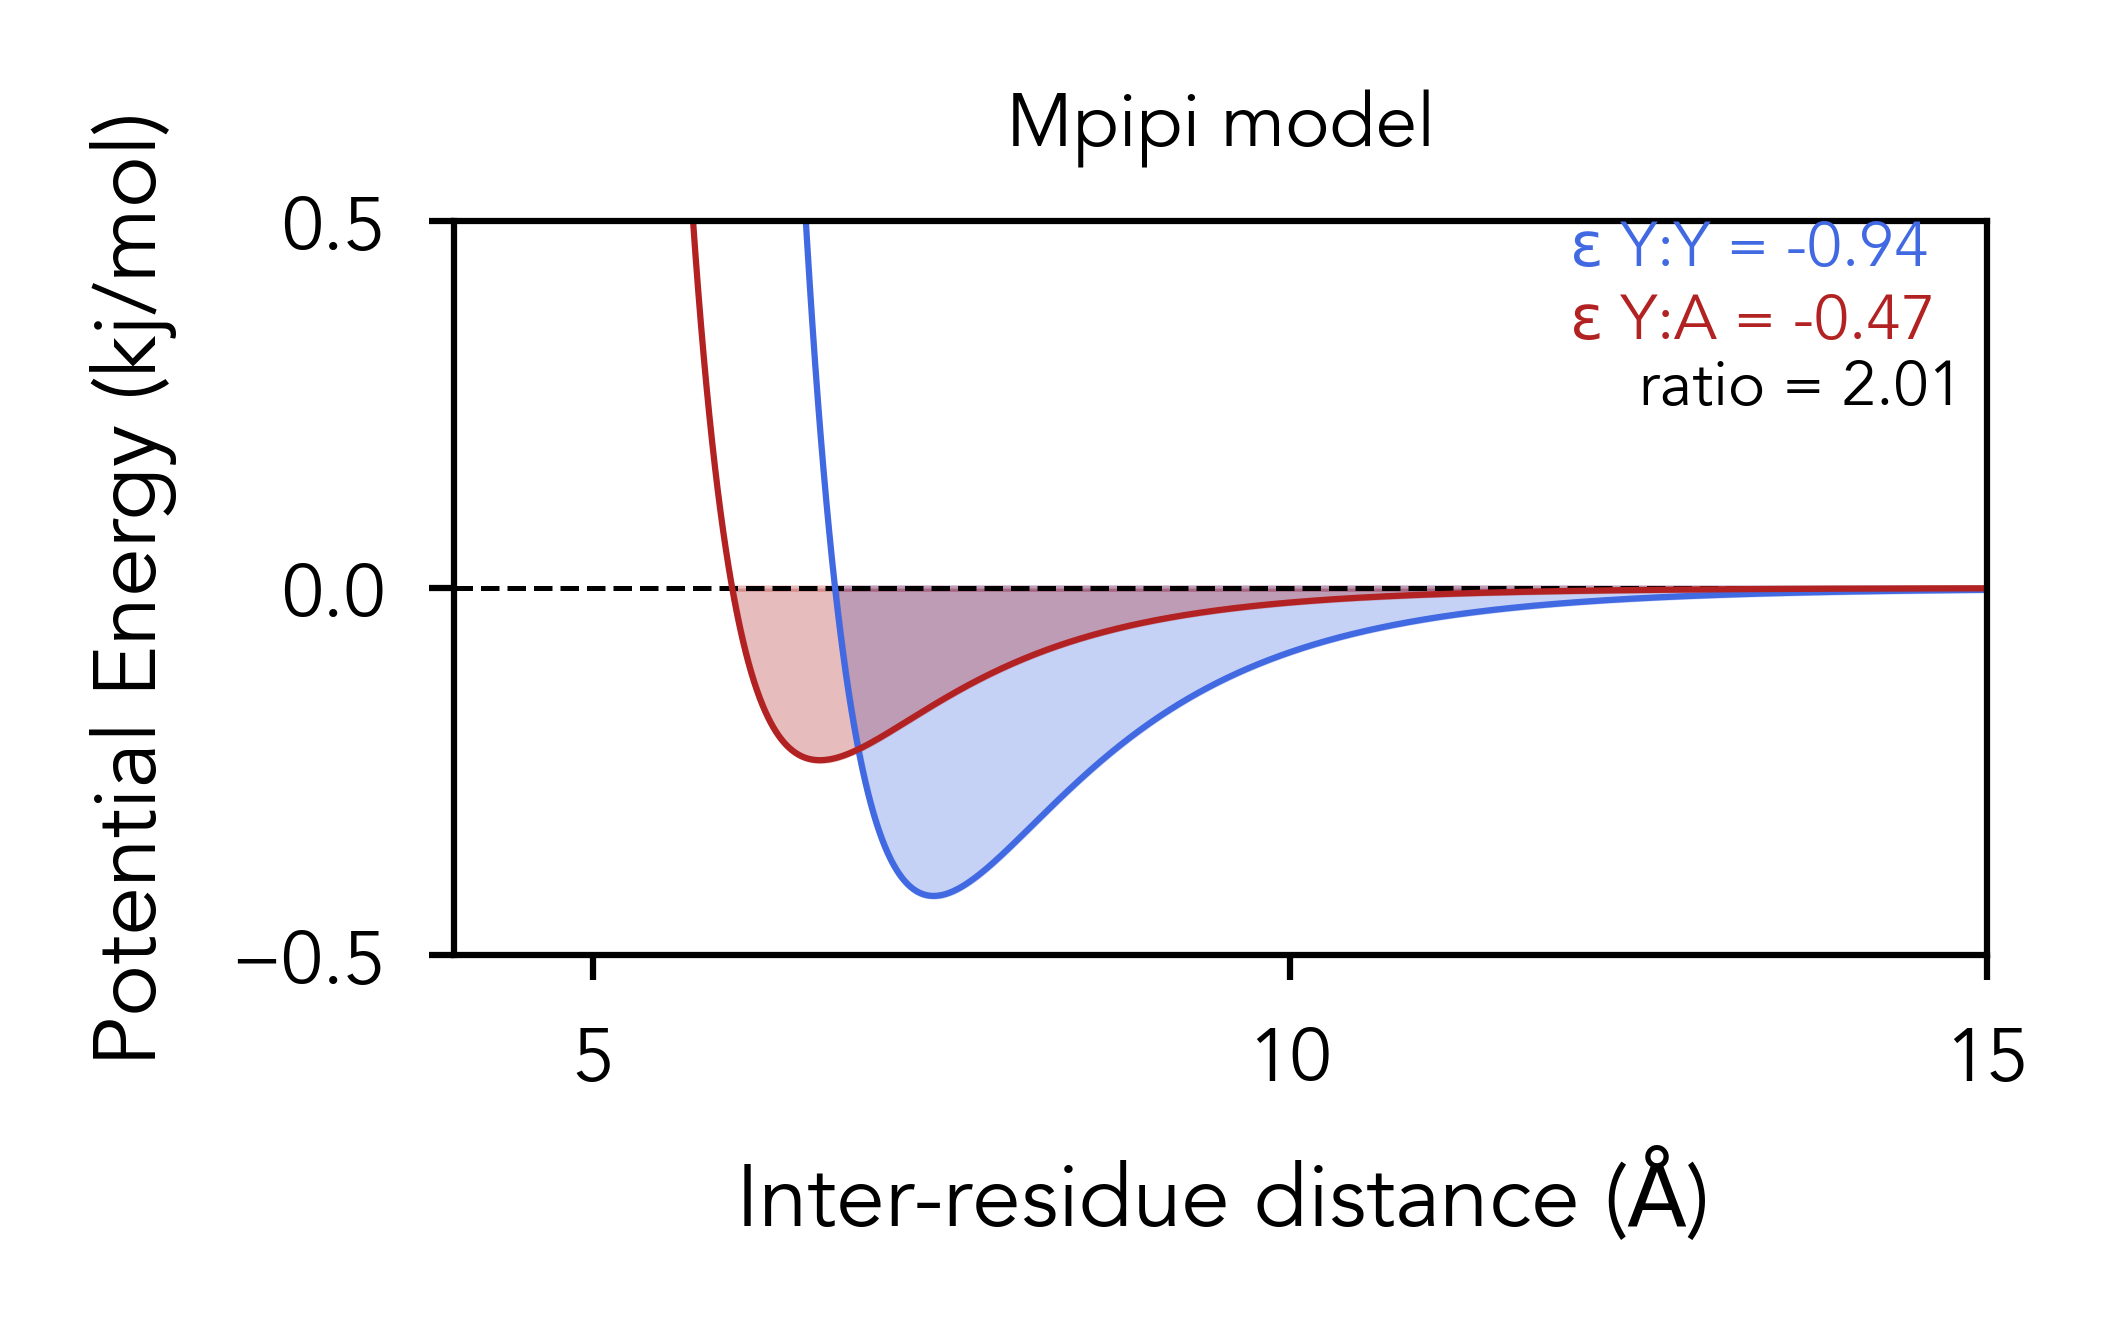

In [4]:
r_step  = 0.01
max_r = 20
min_r =0.01

r_indices = np.arange(0.001,20,r_step)


color1='royalblue'
color2='firebrick'


fig = plt.figure(figsize=(2.5, 1.6), dpi=450)
ax = plt.gca()
ax.axhline(0,ls='--',color='k',lw=0.4)

Y_Y_potential = mf.IMC_object.parameters.compute_full_Mpipi('Y','Y',r_indices)
Y_G_potential = mf.IMC_object.parameters.compute_full_Mpipi('Y','A',r_indices)


plt.plot(r_indices, Y_Y_potential, color1, ls='-',lw=0.5)
plt.plot(r_indices, Y_G_potential, color2, ls='-',lw=0.5)
plt.ylim([-0.5,0.5])
plt.xlim([4, 15])
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.fill_between(r_indices, Y_Y_potential, where=(Y_Y_potential < 0),color=color1, alpha=0.3, lw=0.5)
plt.fill_between(r_indices, Y_G_potential, where=(Y_G_potential < 0),color=color2, alpha=0.3, lw=0.5)
plt.title('Mpipi model',fontsize=6)

yy_interaction = mf.IMC_object.parameters.compute_interaction_parameter('Y','Y')[0]
yg_interaction =mf.IMC_object.parameters.compute_interaction_parameter('Y','A')[0]
plt.text(12.0, 0.44, r"$\rm\epsilon$ " + f"Y:Y = {round(yy_interaction,2)}", fontsize=5, color=color1)
plt.text(12.0, 0.34, r"$\rm\epsilon$ " + f"Y:A = {round(yg_interaction,2)}", fontsize=5, color=color2)
plt.text(12.5, 0.25, f"ratio = {round(yy_interaction/yg_interaction,2)}", fontsize=5, color='k')

plt.xlabel(r'Inter-residue distance ($\rm\AA$)', fontsize=7)
plt.ylabel(r'Potential Energy (kj/mol)', fontsize=7)
plt.tight_layout()
plt.savefig('interaction_potential.pdf')

           


Text(0, 0.5, 'Potential Energy (kj/mol)')

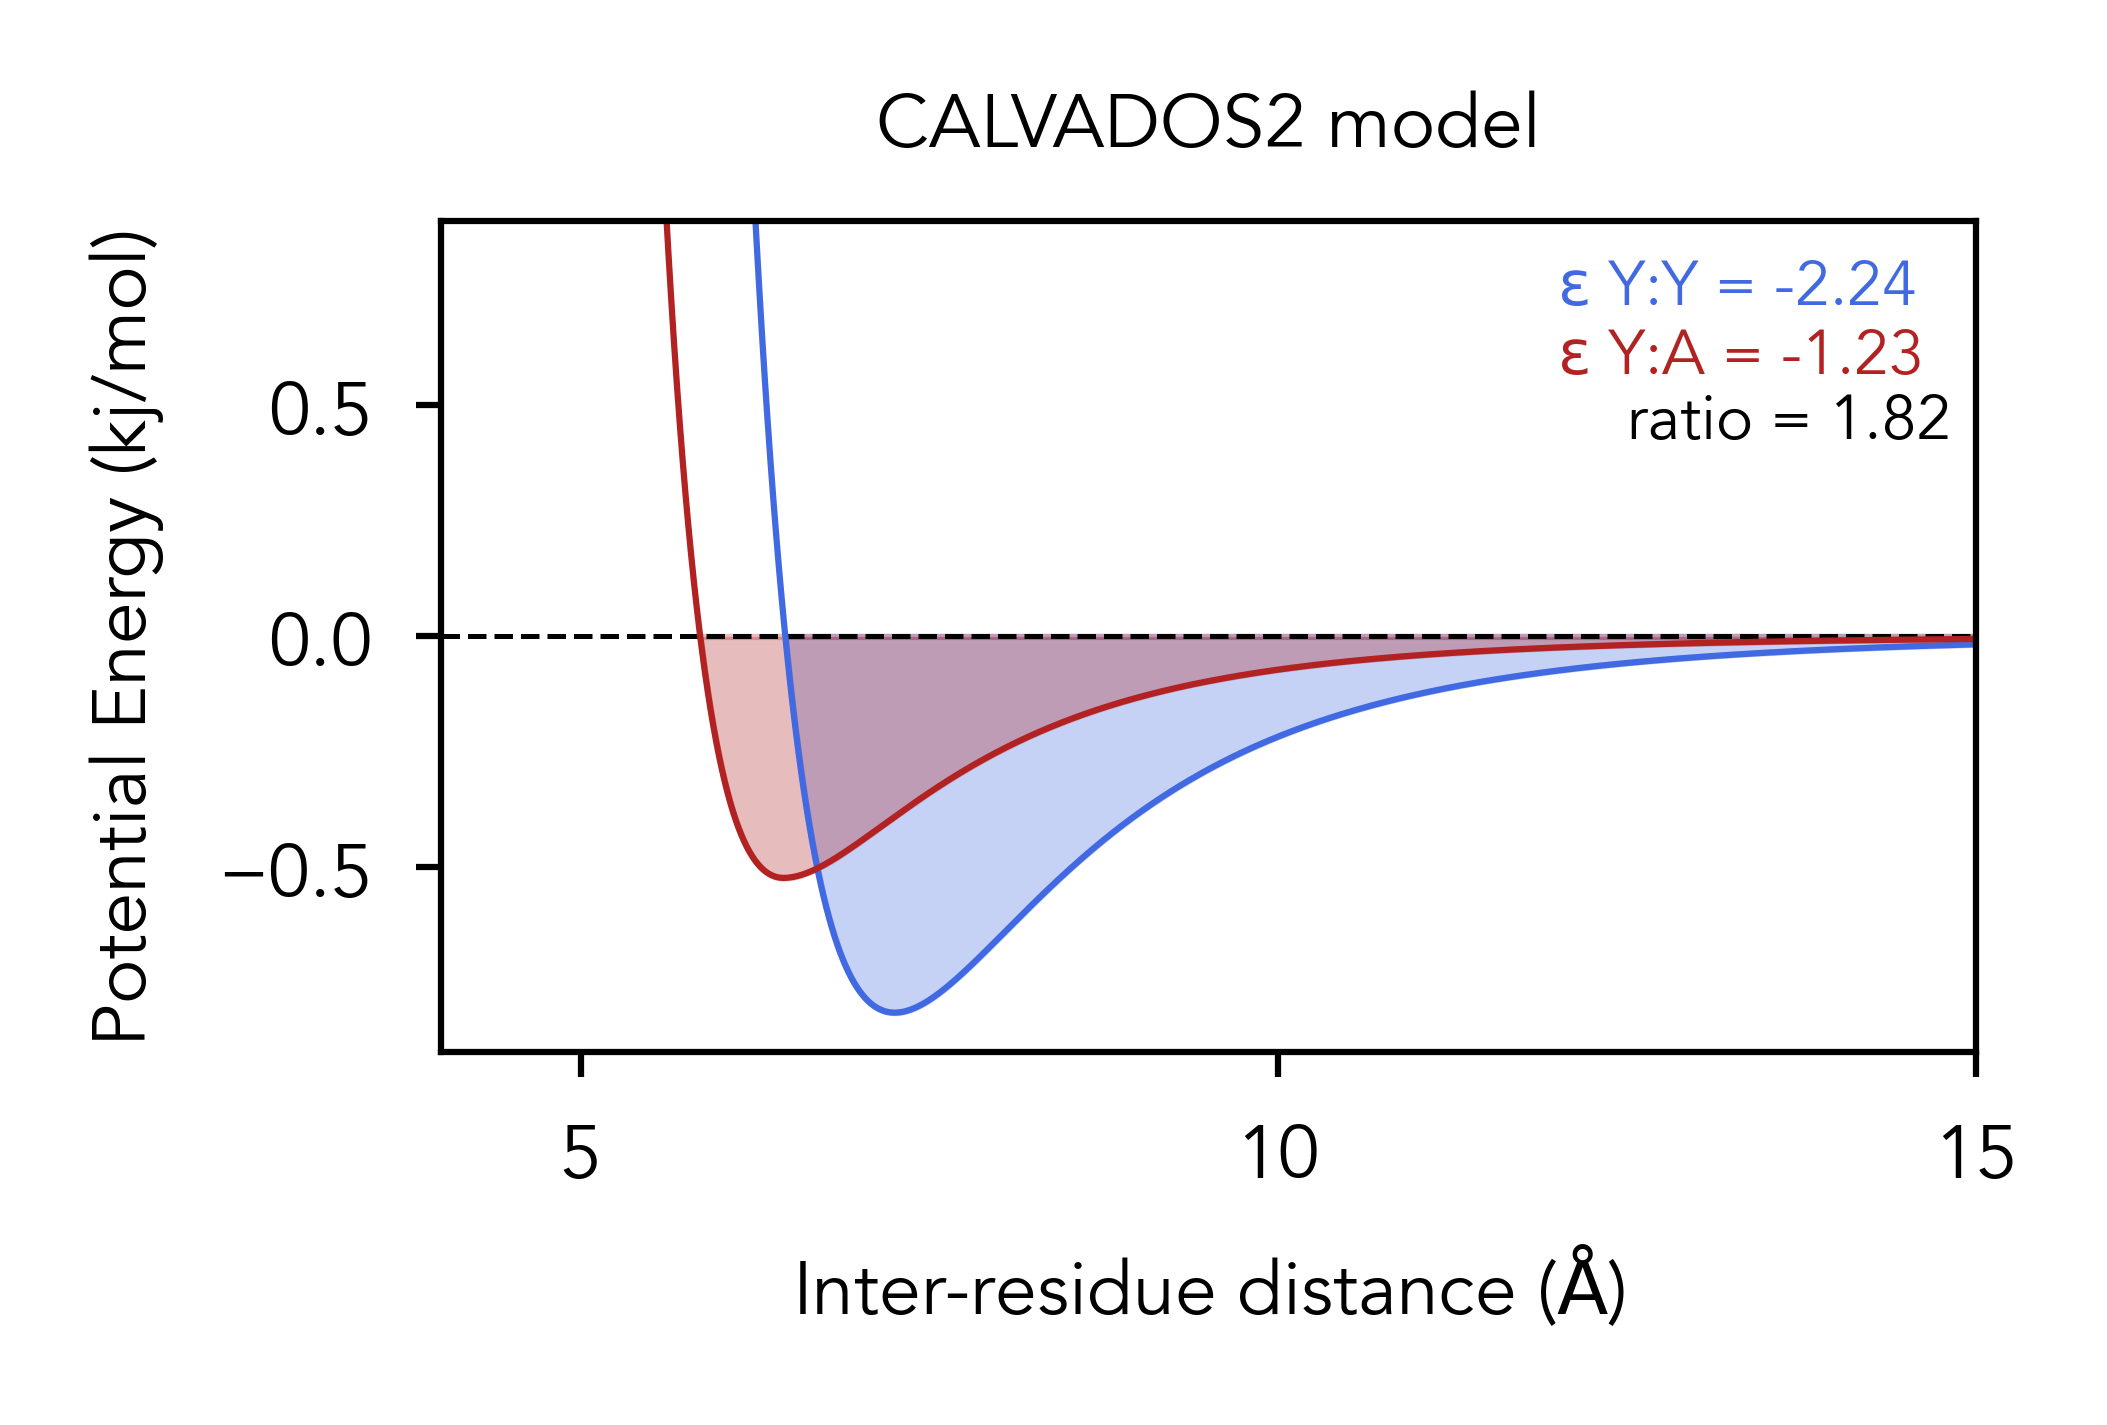

In [5]:
r_step  = 0.01
max_r = 20
min_r =0.01

r_indices = np.arange(0.001,20,r_step)

color1='royalblue'
color2='firebrick'


fig = plt.figure(figsize=(2.2, 1.2), dpi=450)
ax = plt.gca()
ax.axhline(0,ls='--',color='k',lw=0.4)

Y_Y_potential = cf.IMC_object.parameters.compute_full_calvados('Y','Y',r_indices)
Y_G_potential = cf.IMC_object.parameters.compute_full_calvados('Y','A',r_indices)


plt.plot(r_indices, Y_Y_potential, color=color1, ls='-',lw=0.5)
plt.plot(r_indices, Y_G_potential, color=color2, ls='-',lw=0.5)
plt.ylim([-0.9,0.9])
plt.xlim([4, 15])
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.title('CALVADOS2 model',fontsize=6)

plt.fill_between(r_indices, Y_Y_potential, where=(Y_Y_potential < 0),color=color1, alpha=0.3, lw=0.5)
plt.fill_between(r_indices, Y_G_potential, where=(Y_G_potential < 0),color=color2, alpha=0.3, lw=0.5)

yy_interaction = cf.IMC_object.parameters.compute_interaction_parameter('Y','Y')[0]
yg_interaction = cf.IMC_object.parameters.compute_interaction_parameter('Y','A')[0]
plt.text(12.0, 0.72, r"$\rm\epsilon$ " + f"Y:Y = {round(yy_interaction,2)}", fontsize=5, color=color1)
plt.text(12.0, 0.57, r"$\rm\epsilon$ " + f"Y:A = {round(yg_interaction,2)}", fontsize=5, color=color2)
plt.text(12.5, 0.43, f"ratio = {round(yy_interaction/yg_interaction,2)}", fontsize=5, color='k')




plt.xlabel(r'Inter-residue distance ($\rm\AA$)', fontsize=6)
plt.ylabel(r'Potential Energy (kj/mol)', fontsize=6)

           


# Design random sequence for demonstration
The code below let us design a synthetic sequence to visualize nice features

In [6]:
try:
    from goose import create
    from sparrow import Protein
    
    f0 = create.sequence(15, FCR=0.1)
    f1 = create.sequence(15, NCPR=0.6,FCR=0.6)
    f2 = create.sequence(30, FCR=0.1)
    f3 = create.sequence(15, NCPR=-0.2, FCR=0.6)
    f4 = create.sequence(15, FCR=0.1)
    final = f0+f1+f2+f3+f4
    
    
    Protein(final).show_sequence(blocksize=100)
except ModuleNotFoundError as e:
    print("Missing a module, but tbh you don't really need to run this...")
    raise(e)

Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


In [7]:
# Note - for the manuscript we use the sequence below, which we re-define here 
# so we don't randomly generate a new sequence!
used_seq = 'ATQGNRSTSNNQRGTNRRRTSKHRRGSRKRTSQKQDNTNHQQTSSADTTNQHNQNQQQGTDDSTSDNQERREAKDRNNKTTHAGTNHNAN'

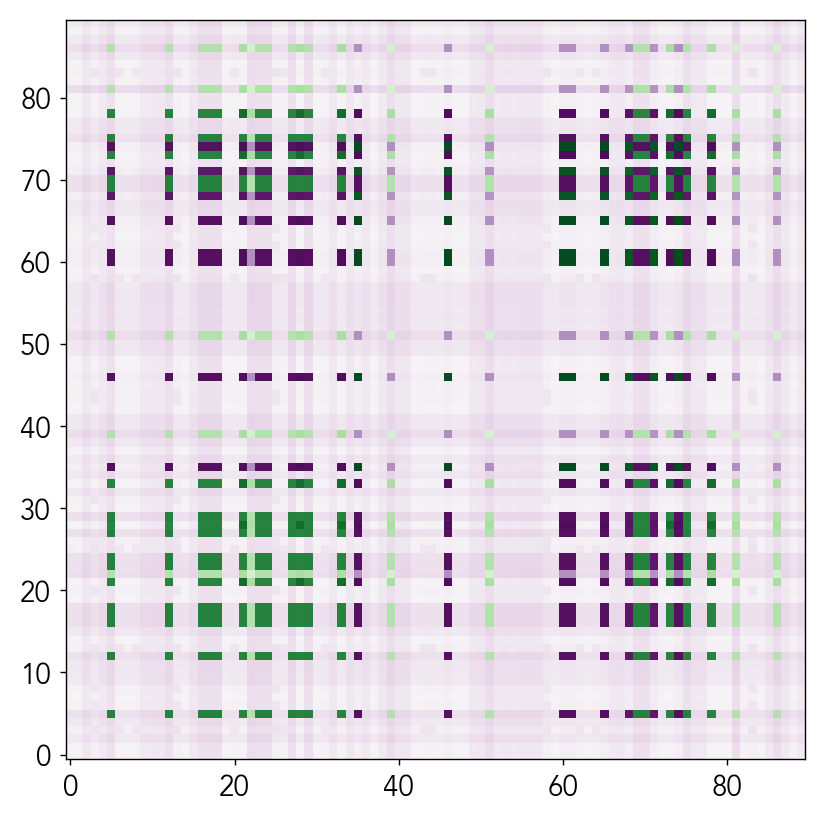

In [8]:
plt.imshow(mf.IMC_object.calculate_pairwise_homotypic_matrix(used_seq), cmap='PRGn', origin='lower', vmin=-3, vmax=3)
plt.savefig('simple_matrix.pdf')

1.160174914639498


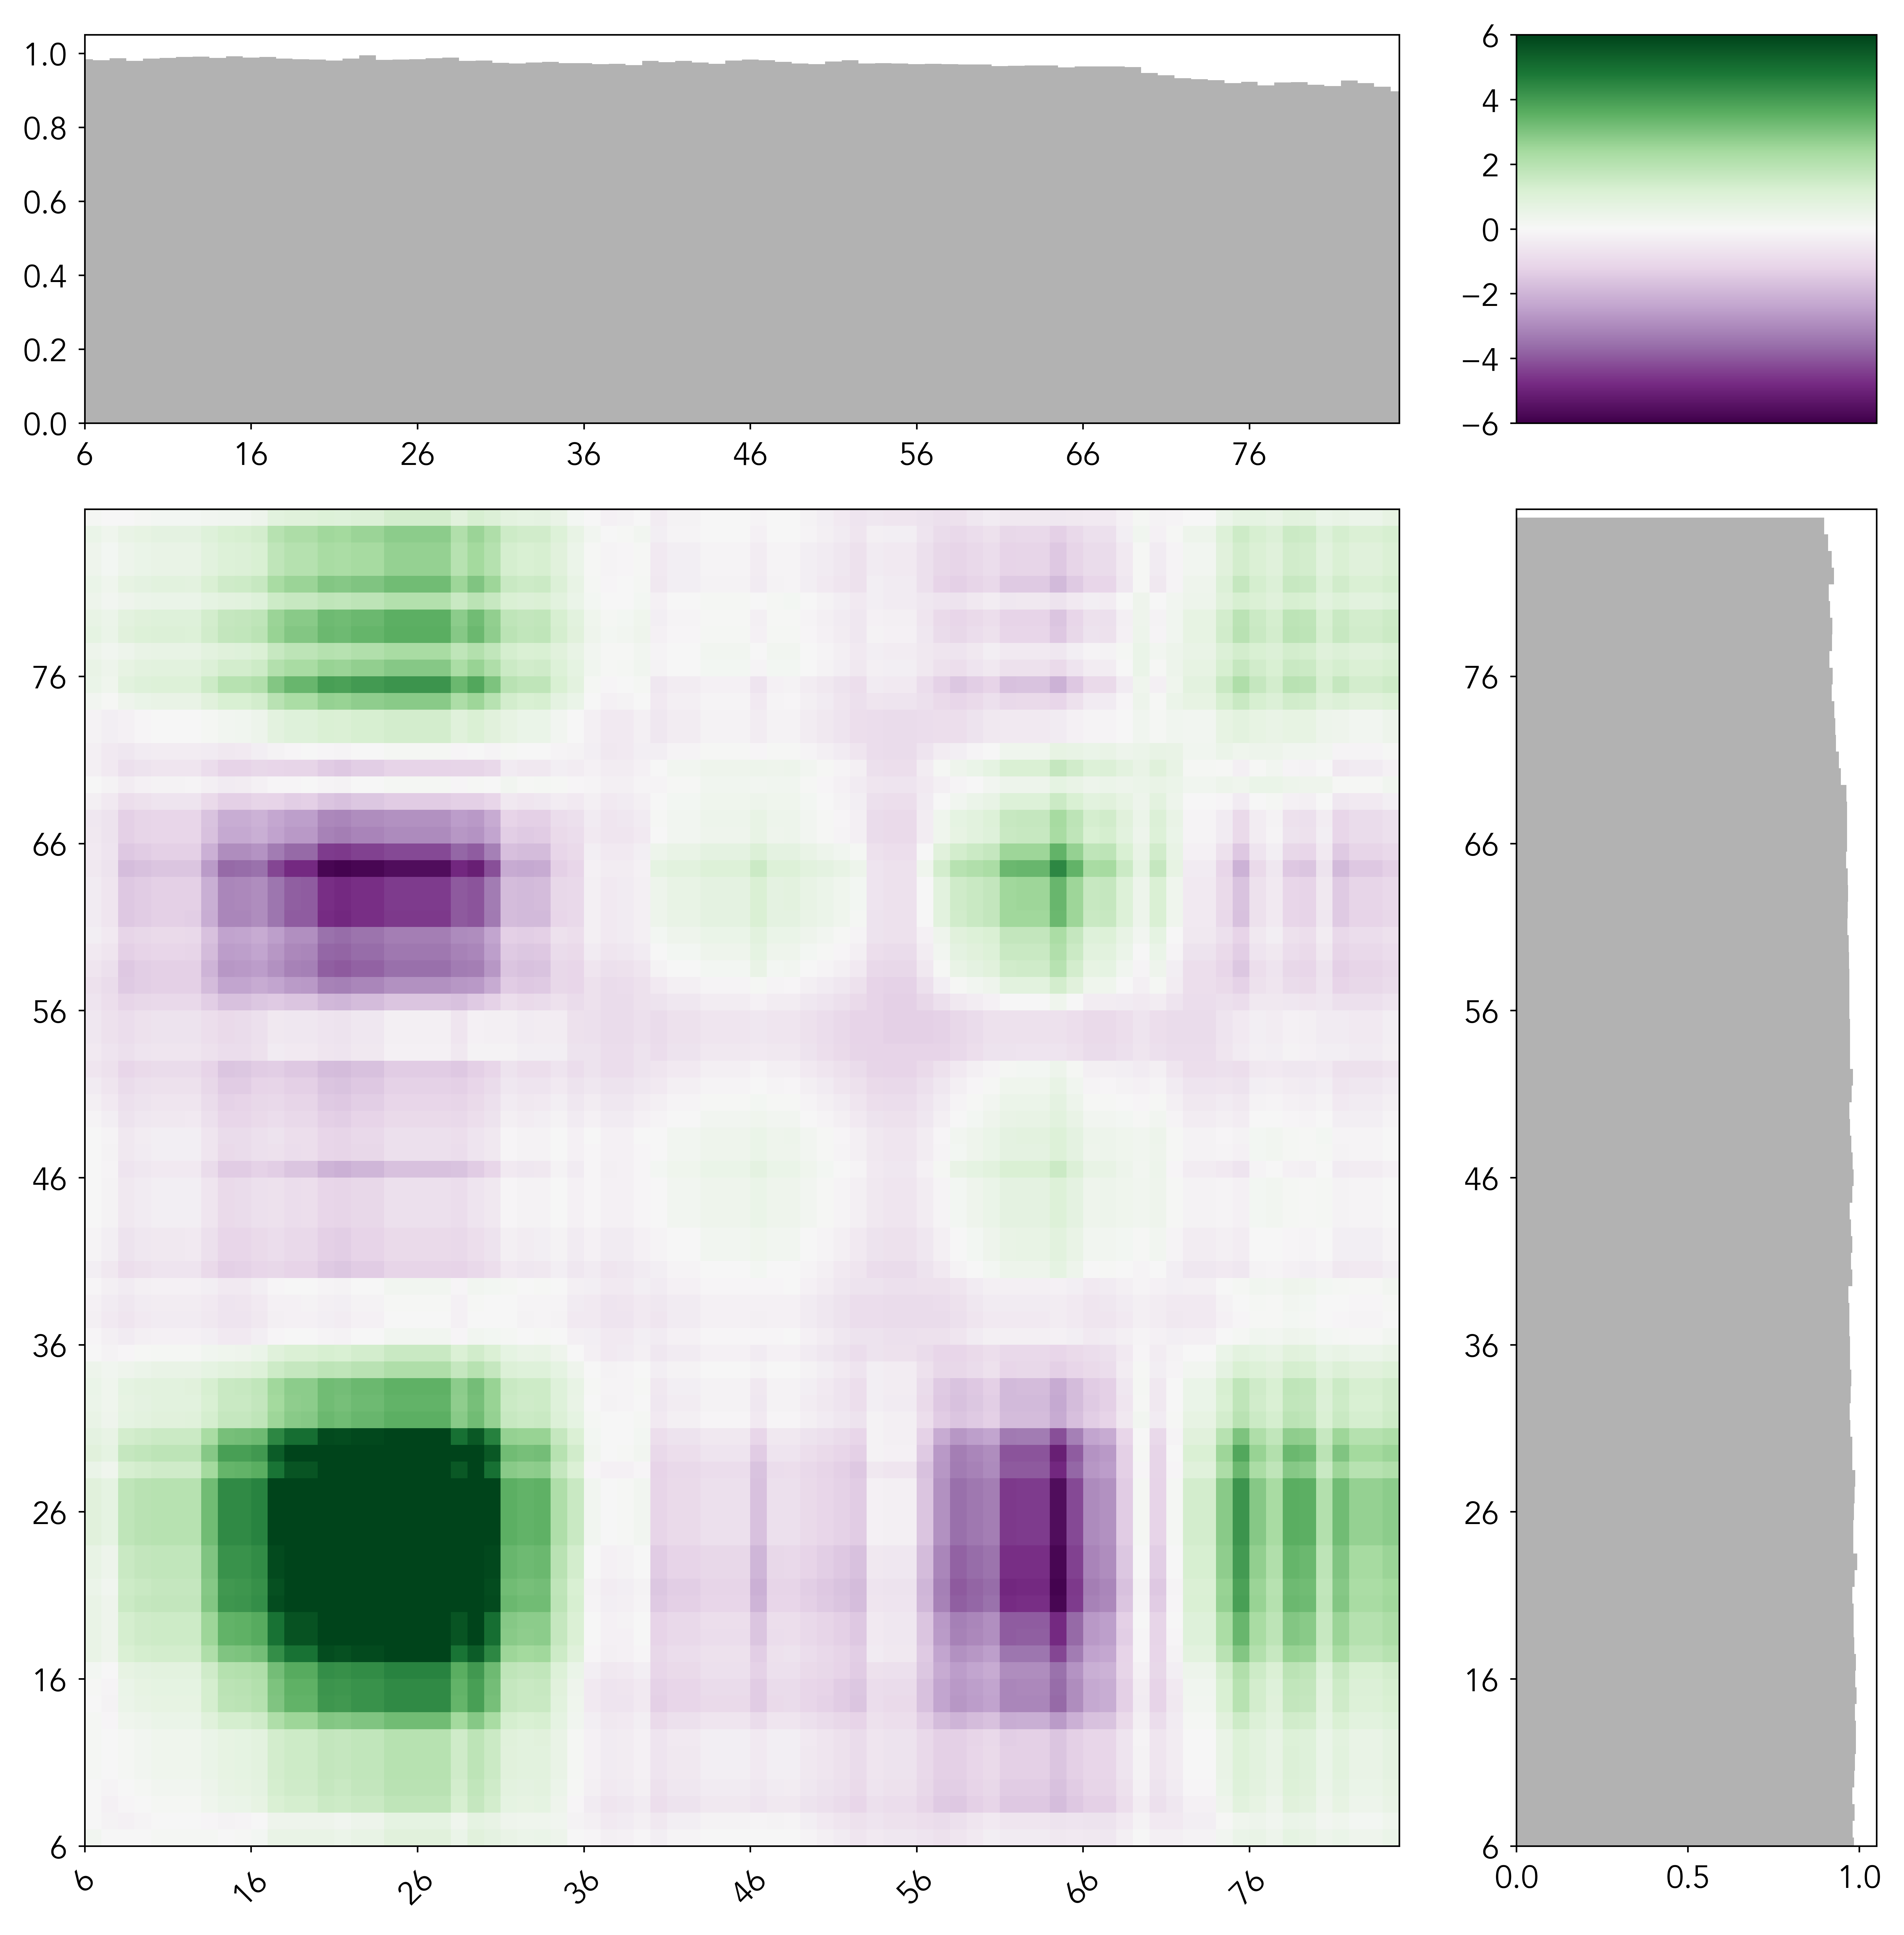

In [9]:
mf.interaction_figure(used_seq,used_seq,window_size=11, vmin=-6, vmax=6,fname='simple_matrix_smoothed.pdf', tic_frequency=10)
print(mf.epsilon(used_seq,used_seq))